In [1]:
import pickle
import pandas as pd 
import numpy as np 

In [3]:
# Shared folder to read data
SHARED_FOLDER = './yelp'

# Your folder to write new data and create notebooks.
MY_FOLDER = './output'

# result of all

In [4]:
all_business=pd.read_csv('{}/business_df.csv'.format(SHARED_FOLDER))
all_business

,Unnamed: 0,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,...,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count
0,0,"{'Ambience': {'intimate': False, 'romantic': F...",4gRF6fR91xqaur88C3_DWw,"['Pizza', 'Restaurants', 1]",Tempe,{},33.422218,-111.925847,False,23,...,25,25,25,25,25,25,2.391304,23,3,10
1,1,"{'Dogs Allowed': True, 'Ambience': {'intimate'...",QQ0VZ1ggQO1aVf_GK6kn5g,"['Vegetarian', 'Diners', 'Vegan', 'Restaurants...",Phoenix,"{'Monday': {'close': '16:00', 'open': '07:00'}...",33.457226,-112.089834,False,216,...,16,7,16,7,16,7,4.216080,199,45,620
2,2,"{'Wheelchair Accessible': True, 'Attire': 'cas...",iung9K8cFAPLdA9k2DUoxA,"['Barbeque', 'Restaurants', 1]",Phoenix,{},33.678615,-111.974607,False,31,...,25,25,25,25,25,25,2.300000,30,7,22
3,3,"{'Alcohol': 'none', 'Outdoor Seating': True, '...",QBoynogVWpl44LglOEIYhw,"['Tex-Mex', 'Restaurants', 1]",Tempe,{},33.414355,-111.926294,True,46,...,25,25,25,25,25,25,3.500000,46,9,150
4,4,"{'Alcohol': 'none', 'Outdoor Seating': True, '...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Monday': {'close': '22:00', 'open': '10:30'}...",33.379200,-111.785500,True,5,...,22,10,22,10,22,10,2.600000,5,7,55
5,5,"{'Parking': {'lot': True, 'garage': False, 'va...",LTk9XA-htXS-ngVfnnQPUA,"['Food', 'Automotive', 'Convenience Stores', '...",Phoenix,"{'Monday': {'close': '00:00', 'open': '00:00'}...",33.479867,-112.117920,True,6,...,0,0,0,0,0,0,4.200000,5,2,124
6,6,"{'Noise Level': 'average', 'Wheelchair Accessi...",D0tHnskAgaRjCBdoXVev_g,"['Fast Food', 'Restaurants', 1]",Tempe,{},33.407353,-111.945569,True,29,...,25,25,25,25,25,25,3.666667,27,15,178
7,7,"{'Wheelchair Accessible': True, 'Attire': 'cas...",Kqn4J9NTgZdMAnV4HuYh5A,"['Food', 'Coffee & Tea', 1]",Phoenix,{},33.675854,-111.966734,False,62,...,25,25,25,25,25,25,4.338710,62,15,171
8,8,"{'Parking': {'lot': True, 'garage': False, 'va...",omHC9VhPZIQiAXWnZEe8eA,"['Shopping', 'Drugstores', 'Beauty & Spas', 'F...",Gilbert,"{'Monday': {'close': '00:00', 'open': '00:00'}...",33.267073,-111.686889,True,10,...,0,0,0,0,0,0,2.875000,8,3,35
9,9,"{'Good for Kids': True, 'Good For': {'breakfas...",cjUmPLRT43wN9Z87A9BOpg,"['Bars', 'American (Traditional)', 'Nightlife'...",Phoenix,"{'Monday': {'close': '01:00', 'open': '11:00'}...",33.509568,-112.073327,True,85,...,2,11,1,11,1,11,2.756410,78,30,357


In [17]:
del all_business['Unnamed: 0']

In [23]:
del all_business['attributes.AgesAllowed']

In [5]:
import xgboost as xgb
import operator

In [24]:
#train=business_review_tip_checkin_df.columns[5]
features = list(all_business.columns[5:116])
X = all_business[features]
del X['stars']
#del X['reviews_count']
#del X['avg_review_stars']
X

,latitude,longitude,open,review_count,categories_Fastfood,categories_Sandwiches,categories_Pizza,categories_Vegetarian,categories_Barbeque,categories_Tex-Mex,...,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count
0,33.422218,-111.925847,False,23,0,0,1,0,0,0,...,25,25,25,25,25,25,2.391304,23,3,10
1,33.457226,-112.089834,False,216,0,0,0,1,0,0,...,16,7,16,7,16,7,4.216080,199,45,620
2,33.678615,-111.974607,False,31,0,0,0,0,1,0,...,25,25,25,25,25,25,2.300000,30,7,22
3,33.414355,-111.926294,True,46,0,0,0,0,0,1,...,25,25,25,25,25,25,3.500000,46,9,150
4,33.379200,-111.785500,True,5,1,0,0,0,0,1,...,22,10,22,10,22,10,2.600000,5,7,55
5,33.479867,-112.117920,True,6,0,0,0,0,0,0,...,0,0,0,0,0,0,4.200000,5,2,124
6,33.407353,-111.945569,True,29,1,0,0,0,0,0,...,25,25,25,25,25,25,3.666667,27,15,178
7,33.675854,-111.966734,False,62,0,0,0,0,0,0,...,25,25,25,25,25,25,4.338710,62,15,171
8,33.267073,-111.686889,True,10,0,0,0,0,0,0,...,0,0,0,0,0,0,2.875000,8,3,35
9,33.509568,-112.073327,True,85,0,0,0,0,0,0,...,2,11,1,11,1,11,2.756410,78,30,357


In [25]:
y =all_business['stars']
y

0       2.5
1       4.5
2       2.5
3       3.5
4       2.5
5       4.5
6       3.5
7       4.5
8       3.0
9       2.5
10      2.5
11      3.5
12      4.0
13      3.0
14      3.0
15      4.0
16      3.5
17      4.0
18      2.5
19      4.0
20      2.5
21      3.0
22      4.5
23      4.0
24      4.5
25      3.5
26      1.5
27      4.0
28      4.5
29      4.0
       ... 
1227    3.0
1228    3.5
1229    4.0
1230    4.0
1231    4.5
1232    3.5
1233    2.0
1234    2.5
1235    2.5
1236    4.0
1237    4.0
1238    2.0
1239    3.5
1240    3.0
1241    2.5
1242    3.0
1243    3.5
1244    3.0
1245    3.0
1246    3.5
1247    3.5
1248    2.5
1249    4.0
1250    4.5
1251    4.0
1252    4.0
1253    3.0
1254    5.0
1255    2.0
1256    3.0
Name: stars, dtype: float64

In [26]:
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('avg_review_stars', 4298), ('latitude', 2746), ('longitude', 2356), ('review_count', 1320), ('checkin_count', 1200), ('reviews_count', 1188), ('tip_count', 801), ('hours.Friday.close', 532), ('attributes.NoiseLevel', 375), ('attributes.WheelchairAccessible', 351), ('attributes.PriceRange', 344), ('hours.Wednesday.close', 280), ('attributes.DriveThru', 271), ('attributes.OutdoorSeating', 269), ('categories_Pizza', 266), ('attributes.Caters', 263), ('hours.Thursday.close', 247), ('hours.Sunday.close', 240), ('hours.Friday.open', 220), ('categories_Fastfood', 206), ('attributes.GoodForGroups', 189), ('categories_American_Traditional', 187), ('hours.Sunday.open', 180), ('hours.Saturday.close', 178), ('attributes.Alcohol', 175), ('Automotive', 172), ('attributes.Parking.lot', 166), ('attributes.WiFi', 156), ('hours.Monday.open', 151), ('categories_Salad', 150), ('attributes.WaiterService', 134), ('hours.Monday.close', 131), ('attributes.TakesReservations', 130), ('attributes.Parking.garag

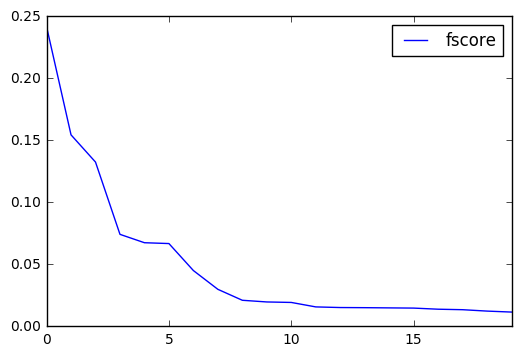

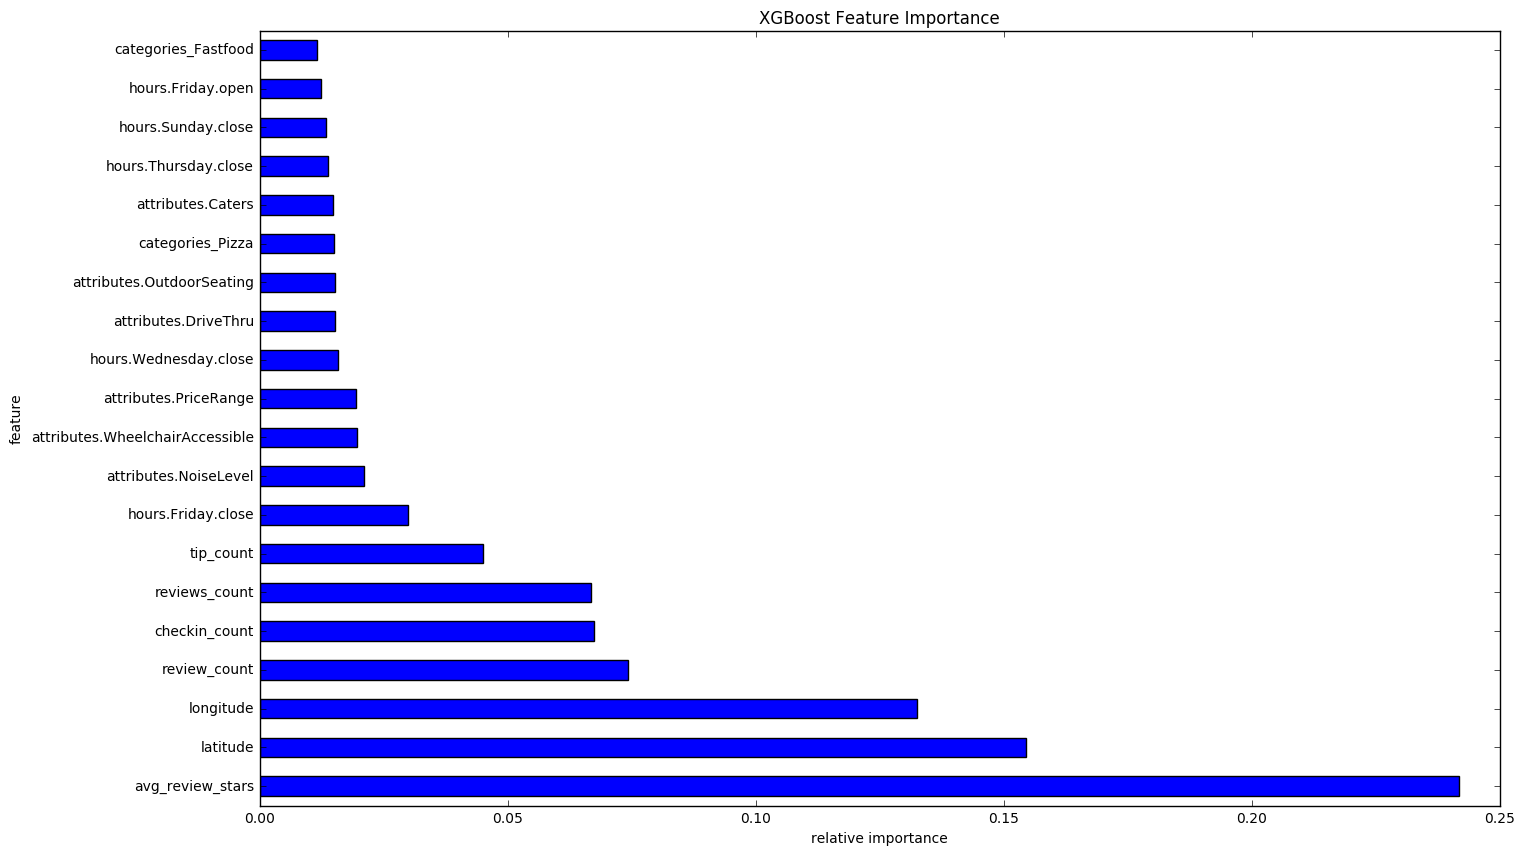

In [27]:
from matplotlib import pylab as plt
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

# category fast food

In [29]:
category_fastfood=pd.read_csv('{}/category_fastfood.csv'.format(SHARED_FOLDER))
all_business=category_fastfood
del all_business['Unnamed: 0']
del all_business['attributes.AgesAllowed']
all_business

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count,category,category1
0,"{'Take-out': True, 'Waiter Service': False, 'G...",4gRF6fR91xqaur88C3_DWw,"['Pizza', 'Restaurants', 1]",Tempe,{},33.422218,-111.925847,False,23,2.5,...,25,25,25,25,2.391304,23,3,10,Pizza,Fast Food
1,"{'Take-out': True, 'Waiter Service': False, 'G...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Friday': {'close': '23:00', 'open': '10:30'}...",33.379200,-111.785500,True,5,2.5,...,22,10,22,10,2.600000,5,7,55,Fast Food,Fast Food
2,"{'Drive-Thru': True, 'Parking': {'validated': ...",D0tHnskAgaRjCBdoXVev_g,"['Fast Food', 'Restaurants', 1]",Tempe,{},33.407353,-111.945569,True,29,3.5,...,25,25,25,25,3.666667,27,15,178,Fast Food,Fast Food
3,"{'Take-out': True, 'Waiter Service': True, 'Go...",QTBUIAFtdUx-YMcWaI3GiQ,"['Fast Food', 'Restaurants', 1]",Buckeye,{},33.441598,-112.555938,True,17,2.5,...,25,25,25,25,2.176471,17,4,32,Fast Food,Fast Food
4,"{'Dogs Allowed': True, 'Take-out': True, 'Wait...",noaKqyRwXTW4__8p4h5ZSw,"['Burgers', 'Delis', 'American (New)', 'Restau...",Scottsdale,"{'Friday': {'close': '21:00', 'open': '11:00'}...",33.671877,-111.905845,False,21,4.0,...,21,11,21,11,3.857143,21,11,29,Burgers,Fast Food
5,"{'Take-out': True, 'Waiter Service': False, 'G...",WsMSmLc9ahQJ3gOfN0ShVQ,"['Chicken Wings', 'Restaurants', 1]",Laveen,"{'Friday': {'close': '00:00', 'open': '10:45'}...",33.378666,-112.168879,True,26,3.0,...,0,10,0,10,3.037037,27,6,78,Chicken Wings,Fast Food
6,"{'Music': {'dj': False}, 'Take-out': True, 'Wa...",udVKZfBZ3IyZf_mlTy0law,"['Sandwiches', 'Restaurants', 1]",Wickenburg,"{'Friday': {'close': '16:00', 'open': '07:30'}...",33.969238,-112.730715,True,50,4.0,...,16,7,16,7,4.268293,41,12,104,Sandwiches,Fast Food
7,"{'Drive-Thru': True, 'Parking': {'validated': ...",EuNV8_SReV_3KeET2Ums6A,"['Fast Food', 'Sushi Bars', 'Japanese', 'Resta...",Scottsdale,{},33.489192,-111.927293,False,45,3.0,...,25,25,25,25,3.166667,42,10,177,Fast Food,Fast Food
8,"{'Take-out': True, 'Waiter Service': False, 'G...",93fEJZYc3B-jOMaXce7G5A,"['Italian', 'Pizza', 'Salad', 'Restaurants', 1]",Phoenix,"{'Friday': {'close': '22:00', 'open': '10:30'}...",33.666693,-112.124353,True,173,4.0,...,21,10,21,10,4.206250,160,46,527,Pizza,Fast Food
9,"{'Accepts Credit Cards': True, 'Good For': {'d...",CIgXglXMtnjjbgG6i0BKJg,"['Fast Food', 'Restaurants', 1]",Surprise,{},33.639122,-112.354812,True,4,3.5,...,25,25,25,25,2.666667,3,4,17,Fast Food,Fast Food


In [30]:
#train=business_review_tip_checkin_df.columns[5]
features = list(all_business.columns[5:116])
X = all_business[features]
del X['stars']
#del X['reviews_count']
#del X['avg_review_stars']
X

,latitude,longitude,open,review_count,categories_Fastfood,categories_Sandwiches,categories_Pizza,categories_Vegetarian,categories_Barbeque,categories_Tex-Mex,...,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count
0,33.422218,-111.925847,False,23,0,0,1,0,0,0,...,25,25,25,25,25,25,2.391304,23,3,10
1,33.379200,-111.785500,True,5,1,0,0,0,0,1,...,22,10,22,10,22,10,2.600000,5,7,55
2,33.407353,-111.945569,True,29,1,0,0,0,0,0,...,25,25,25,25,25,25,3.666667,27,15,178
3,33.441598,-112.555938,True,17,1,0,0,0,0,0,...,25,25,25,25,25,25,2.176471,17,4,32
4,33.671877,-111.905845,False,21,0,0,0,0,0,0,...,21,11,21,11,21,11,3.857143,21,11,29
5,33.378666,-112.168879,True,26,0,0,0,0,0,0,...,0,10,0,10,0,10,3.037037,27,6,78
6,33.969238,-112.730715,True,50,0,1,0,0,0,0,...,16,7,16,7,16,7,4.268293,41,12,104
7,33.489192,-111.927293,False,45,1,0,0,0,0,0,...,25,25,25,25,25,25,3.166667,42,10,177
8,33.666693,-112.124353,True,173,0,0,1,0,0,0,...,21,10,21,10,21,10,4.206250,160,46,527
9,33.639122,-112.354812,True,4,1,0,0,0,0,0,...,25,25,25,25,25,25,2.666667,3,4,17


In [31]:
y =all_business['stars']
y

0      2.5
1      2.5
2      3.5
3      2.5
4      4.0
5      3.0
6      4.0
7      3.0
8      4.0
9      3.5
10     4.0
11     4.0
12     3.5
13     3.5
14     3.5
15     4.0
16     4.0
17     3.0
18     3.0
19     3.0
20     3.0
21     3.5
22     4.0
23     4.0
24     1.5
25     1.5
26     1.5
27     1.5
28     1.5
29     1.5
      ... 
499    4.0
500    4.5
501    4.0
502    4.0
503    3.0
504    3.0
505    3.5
506    3.0
507    3.5
508    4.5
509    4.0
510    2.5
511    3.0
512    3.0
513    2.5
514    4.5
515    3.0
516    4.0
517    3.0
518    3.0
519    4.0
520    4.0
521    3.0
522    3.5
523    3.5
524    3.5
525    2.0
526    2.0
527    3.0
528    3.0
Name: stars, dtype: float64

In [32]:
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('avg_review_stars', 3688), ('latitude', 2326), ('longitude', 2232), ('review_count', 1430), ('checkin_count', 1077), ('reviews_count', 1002), ('tip_count', 789), ('attributes.NoiseLevel', 404), ('attributes.Caters', 361), ('attributes.GoodForGroups', 349), ('hours.Friday.open', 329), ('attributes.Alcohol', 316), ('attributes.DriveThru', 297), ('open', 253), ('hours.Friday.close', 234), ('hours.Saturday.close', 232), ('attributes.WiFi', 226), ('categories_Salad', 199), ('categories_Pizza', 193), ('attributes.Attire', 187), ('attributes.PriceRange', 179), ('attributes.Delivery', 178), ('categories_American_Traditional', 176), ('attributes.Ambience.divey', 175), ('hours.Monday.open', 166), ('categories_Fastfood', 161), ('attributes.OutdoorSeating', 159), ('hours.Monday.close', 155), ('attributes.Parking.lot', 146), ('attributes.Ambience.casual', 142), ('attributes.GoodFor.breakfast', 133), ('categories_Sandwiches', 133), ('hours.Thursday.close', 129), ('hours.Sunday.open', 121), ('attri

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001BC0EC3C358>>
Traceback (most recent call last):
  File "C:\Users\18791\Anaconda3\lib\site-packages\xgboost\core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


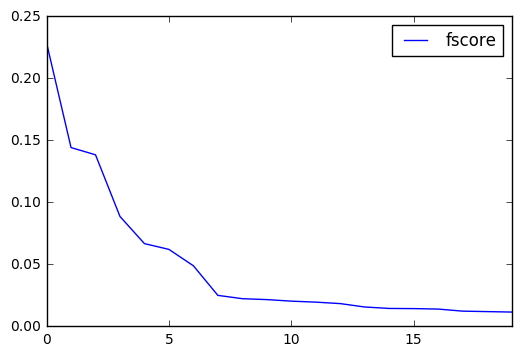

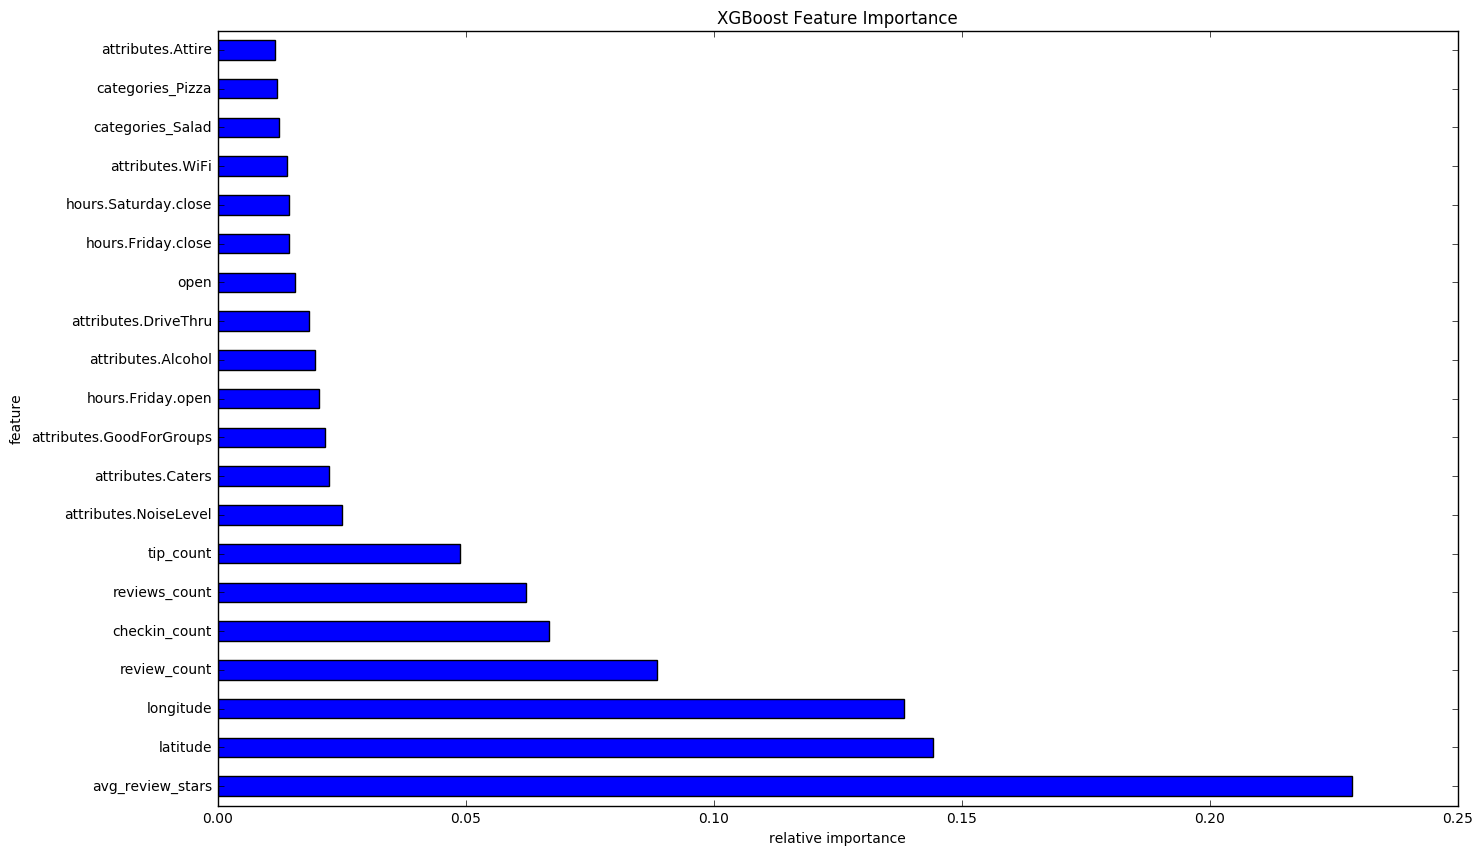

In [33]:
from matplotlib import pylab as plt
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

# category Vegeterian

In [34]:
category_Vegeterian=pd.read_csv('{}/category_Vegeterian.csv'.format(SHARED_FOLDER))
all_business=category_Vegeterian
del all_business['Unnamed: 0']
del all_business['attributes.AgesAllowed']
features = list(all_business.columns[5:116])
X = all_business[features]
del X['stars']
y =all_business['stars']
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)

[('avg_review_stars', 775), ('longitude', 209), ('attributes.Parking.garage', 197), ('latitude', 187), ('review_count', 162), ('tip_count', 128), ('attributes.Ambience.casual', 125), ('attributes.Alcohol', 118), ('attributes.Ambience.hipster', 91), ('hours.Friday.close', 82), ('attributes.Parking.street', 55), ('hours.Sunday.close', 54), ('attributes.NoiseLevel', 39), ('hours.Sunday.open', 25), ('attributes.WiFi', 23), ('hours.Saturday.close', 23), ('attributes.GoodFor.lunch', 22), ('attributes.GoodFor.dinner', 18), ('attributes.OutdoorSeating', 17), ('attributes.DogsAllowed', 14), ('attributes.GoodFor.brunch', 12), ('attributes.Ambience.trendy', 9), ('checkin_count', 9), ('hours.Wednesday.close', 9), ('attributes.BYOB', 7), ('attributes.Delivery', 6), ('reviews_count', 6), ('open', 4), ('hours.Thursday.close', 3), ('hours.Saturday.open', 2), ('hours.Tuesday.close', 2), ('attributes.Corkage', 1), ('hours.Monday.open', 1), ('hours.Wednesday.open', 1)]


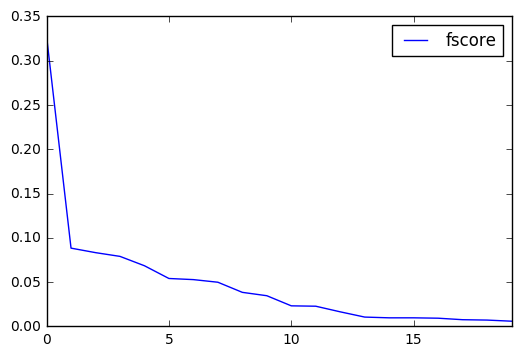

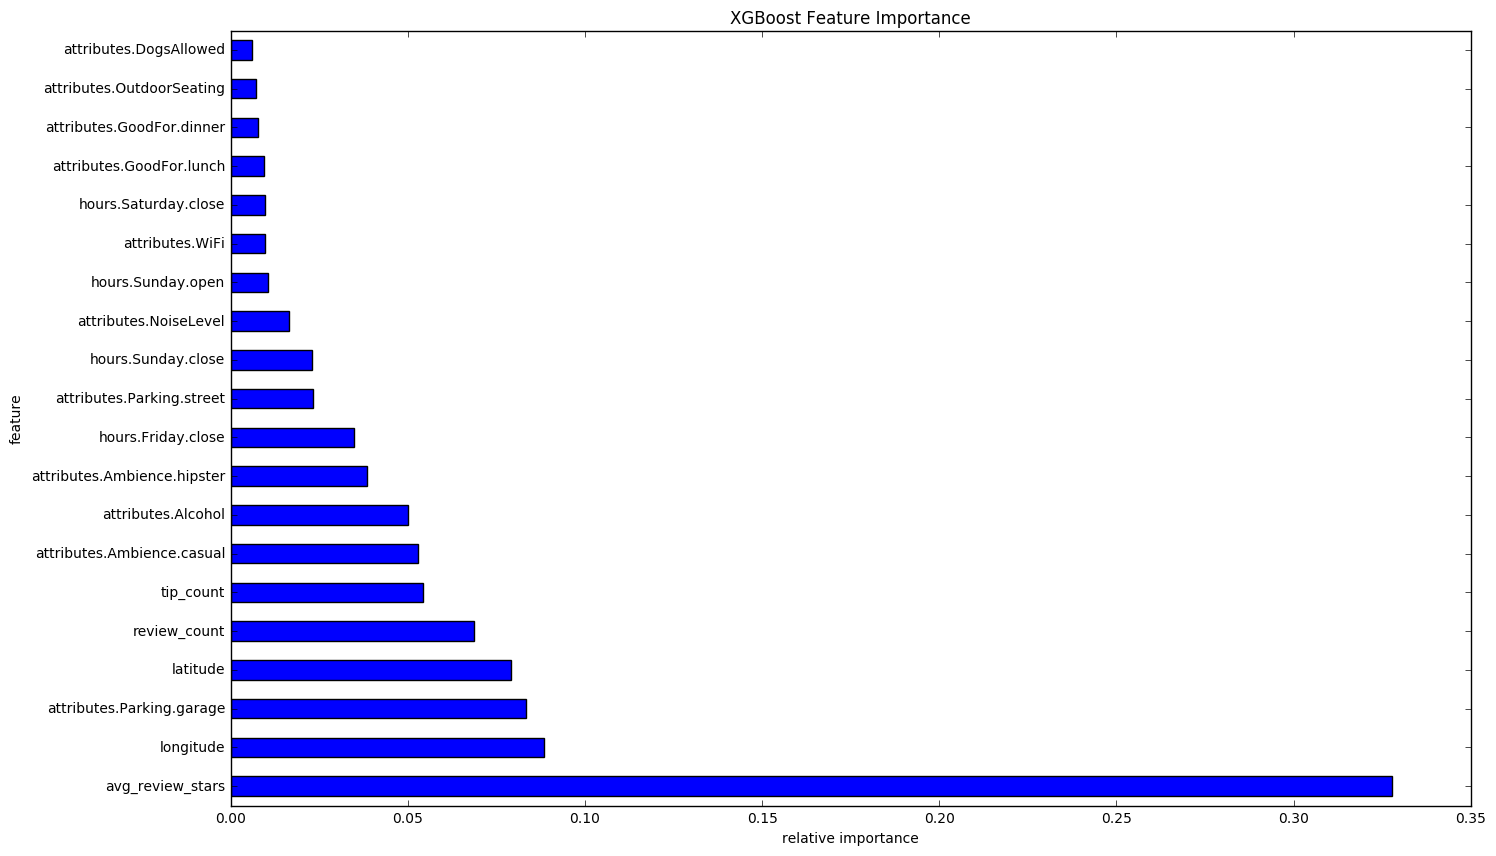

In [35]:
from matplotlib import pylab as plt
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

# category mexican

In [37]:
category_mexican=pd.read_csv('{}/category_mexican.csv'.format(SHARED_FOLDER))
all_business=category_mexican
del all_business['Unnamed: 0']
del all_business['attributes.AgesAllowed']
features = list(all_business.columns[5:116])
X = all_business[features]
del X['stars']
y =all_business['stars']
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)

[('avg_review_stars', 2915), ('latitude', 2583), ('longitude', 1740), ('review_count', 1271), ('checkin_count', 706), ('reviews_count', 628), ('tip_count', 533), ('hours.Friday.close', 336), ('attributes.Alcohol', 298), ('attributes.Caters', 291), ('attributes.NoiseLevel', 229), ('categories_Fastfood', 210), ('attributes.WiFi', 206), ('hours.Friday.open', 205), ('attributes.GoodForGroups', 203), ('attributes.Ambience.casual', 190), ('attributes.WaiterService', 182), ('attributes.DriveThru', 177), ('hours.Saturday.open', 173), ('attributes.DogsAllowed', 172), ('open', 165), ('hours.Sunday.open', 155), ('attributes.BYOB', 150), ('attributes.GoodFor.dinner', 143), ('hours.Monday.close', 135), ('hours.Saturday.close', 126), ('attributes.GoodFor.breakfast', 118), ('attributes.TakesReservations', 112), ('attributes.BYOB/Corkage', 106), ('attributes.Parking.lot', 103), ('categories_Tex-Mex', 97), ('attributes.OutdoorSeating', 96), ('attributes.GoodFor.lunch', 95), ('categories_American_Tradit

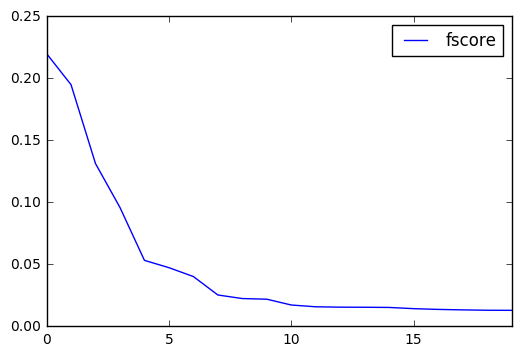

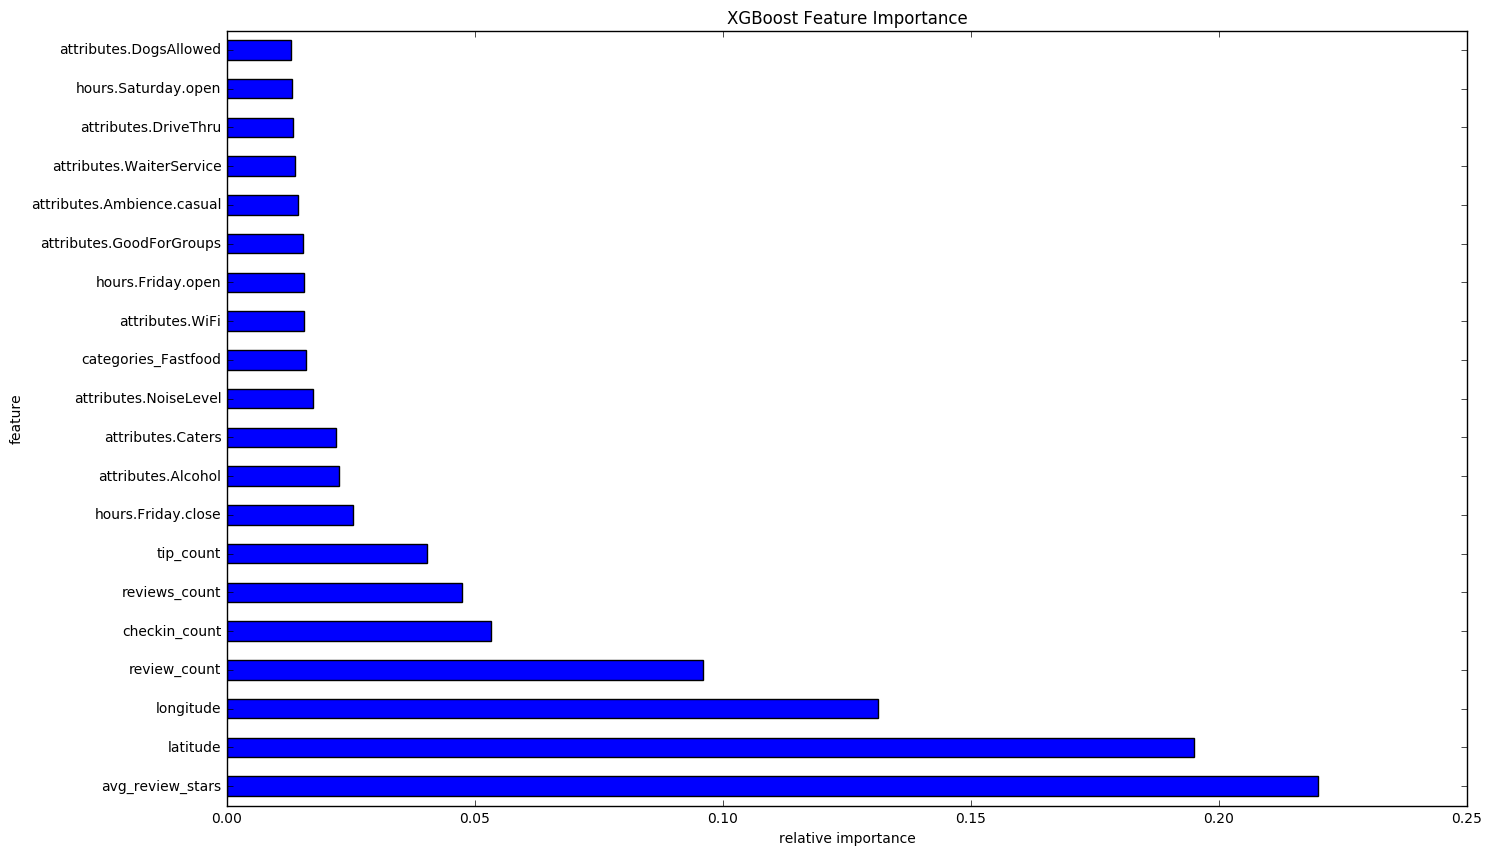

In [38]:
from matplotlib import pylab as plt
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

# category coffee

In [39]:
category_coffee=pd.read_csv('{}/category_coffee.csv'.format(SHARED_FOLDER))
all_business=category_coffee
del all_business['Unnamed: 0']
del all_business['attributes.AgesAllowed']
features = list(all_business.columns[5:116])
X = all_business[features]
del X['stars']
y =all_business['stars']
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)

[('avg_review_stars', 775), ('longitude', 209), ('attributes.Parking.garage', 197), ('latitude', 187), ('review_count', 162), ('tip_count', 128), ('attributes.Ambience.casual', 125), ('attributes.Alcohol', 118), ('attributes.Ambience.hipster', 91), ('hours.Friday.close', 82), ('attributes.Parking.street', 55), ('hours.Sunday.close', 54), ('attributes.NoiseLevel', 39), ('hours.Sunday.open', 25), ('attributes.WiFi', 23), ('hours.Saturday.close', 23), ('attributes.GoodFor.lunch', 22), ('attributes.GoodFor.dinner', 18), ('attributes.OutdoorSeating', 17), ('attributes.DogsAllowed', 14), ('attributes.GoodFor.brunch', 12), ('attributes.Ambience.trendy', 9), ('checkin_count', 9), ('hours.Wednesday.close', 9), ('attributes.BYOB', 7), ('attributes.Delivery', 6), ('reviews_count', 6), ('open', 4), ('hours.Thursday.close', 3), ('hours.Saturday.open', 2), ('hours.Tuesday.close', 2), ('attributes.Corkage', 1), ('hours.Monday.open', 1), ('hours.Wednesday.open', 1)]


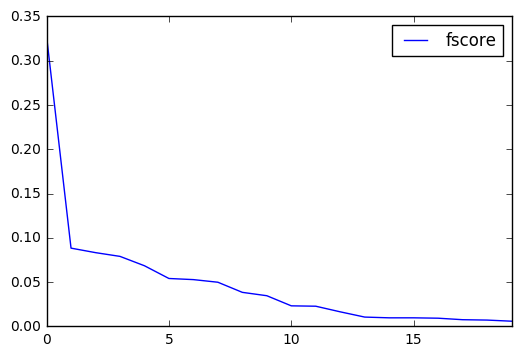

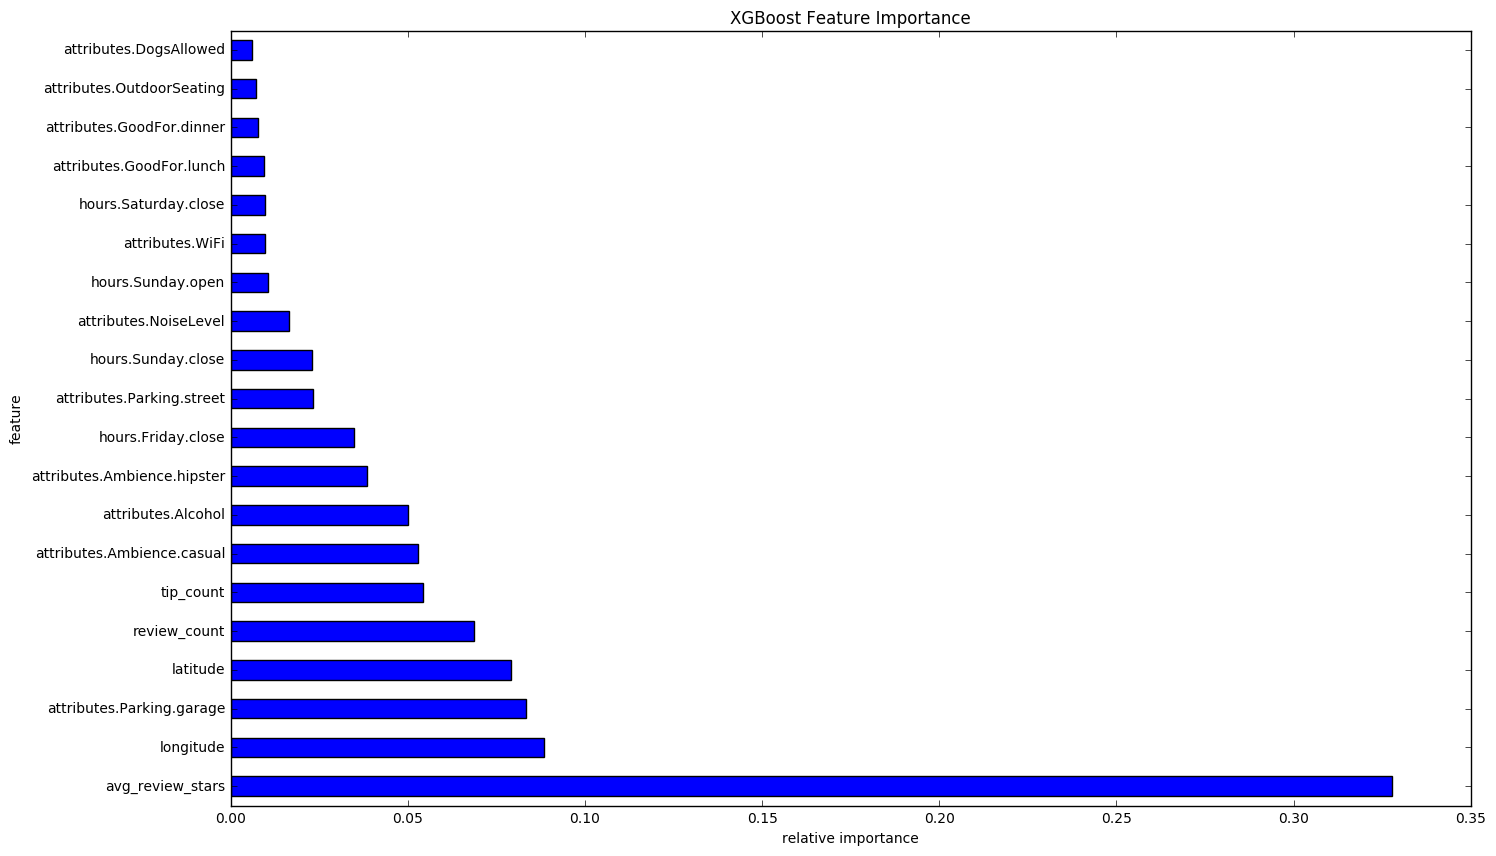

In [40]:
from matplotlib import pylab as plt
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

# category bars

In [41]:
category_bars=pd.read_csv('{}/category_bars.csv'.format(SHARED_FOLDER))
all_business=category_bars
del all_business['Unnamed: 0']
del all_business['attributes.AgesAllowed']
features = list(all_business.columns[5:116])
X = all_business[features]
del X['stars']
y =all_business['stars']
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)

[('avg_review_stars', 2332), ('latitude', 1986), ('longitude', 1608), ('review_count', 661), ('tip_count', 330), ('attributes.NoiseLevel', 326), ('checkin_count', 305), ('categories_American_Traditional', 237), ('attributes.WaiterService', 222), ('attributes.DriveThru', 213), ('reviews_count', 207), ('hours.Saturday.open', 198), ('open', 168), ('hours.Sunday.close', 154), ('attributes.GoodFor.dinner', 150), ('categories_ChickenWings', 148), ('categories_Steakhouses', 119), ('hours.Friday.open', 114), ('attributes.Ambience.casual', 113), ('attributes.Music.jukebox', 95), ('hours.Sunday.open', 94), ('attributes.WiFi', 88), ('attributes.Music.dj', 85), ('attributes.Caters', 80), ('attributes.DogsAllowed', 78), ('attributes.HappyHour', 75), ('attributes.Ambience.divey', 73), ('attributes.WheelchairAccessible', 72), ('hours.Friday.close', 69), ('hours.Thursday.close', 69), ('hours.Monday.close', 68), ('attributes.TakesReservations', 62), ('hours.Saturday.close', 58), ('attributes.Music.vide

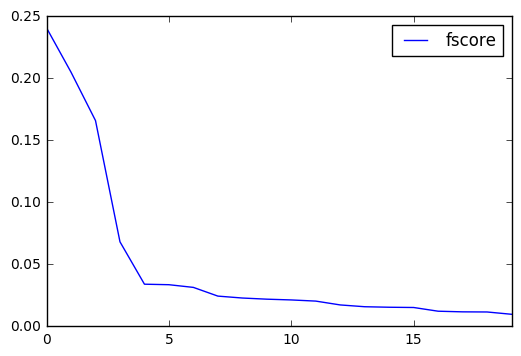

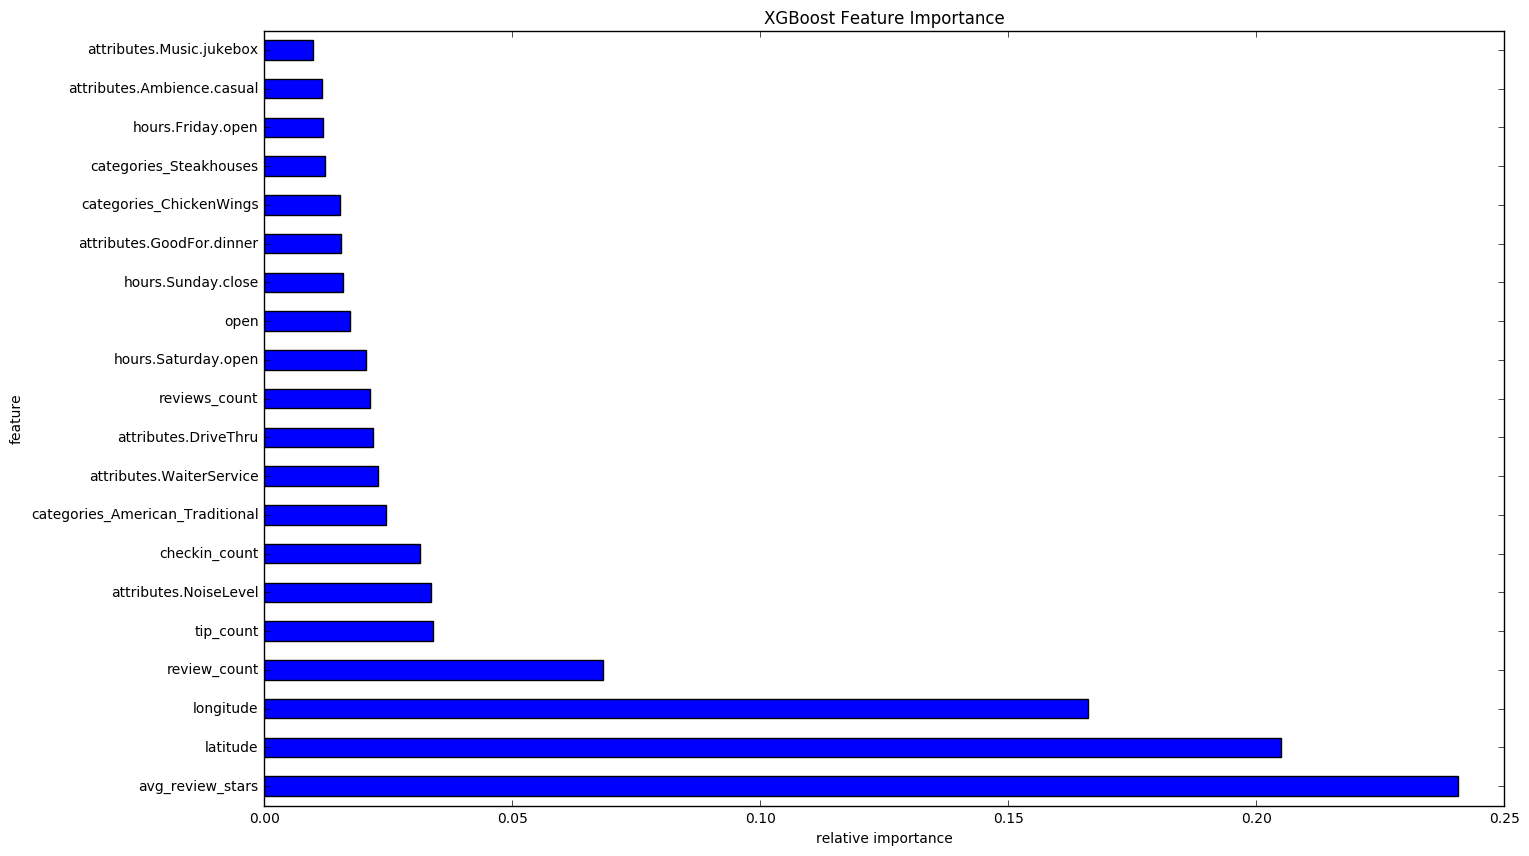

In [42]:
from matplotlib import pylab as plt
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(20)
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()